In [1]:
import requests
import pandas as pd
import os
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotify_credential

In [2]:
with open('StreamingHistory0.json') as f:
    data = json.load(f)

In [3]:
def auth():
    cred = spotify_credential.oauth()
    token = SpotifyClientCredentials(client_id=cred['client_id'], client_secret=cred['client_secret'])
    cache_token = token.get_access_token()
    access_token = cache_token['access_token']
    return access_token

In [4]:
def song_features(song_id, sp):
    try:
        features = sp.audio_features(song_id)
        return features[0]['energy']
    except Exception as e:
        return e

In [11]:
headers = {'Authorization': f"Bearer {auth()}"}
url = 'https://api.spotify.com/v1/search'
i = 0
sp = spotipy.Spotify(auth=auth())
df = pd.DataFrame(columns=['Timestamp', 'Track_ID', 'Track', 'Artist_Name', 'Album', 'Energy', 'Count'])
for item in data:
    if 1:
        track_name = item['trackName']
        artist_name = item['artistName']
        params = {'q':f"{track_name} {artist_name}", 'type': 'track'}
        response = requests.get(url, headers=headers, params=params)
        json_resp = response.json()
        try:
            song_id = json_resp['tracks']['items'][0]['id']
            album = json_resp['tracks']['items'][0]['album']['name']
            time = item['endTime']
        except:
            continue
        track = track_name
        artist_name = artist_name
        song_energy = song_features(song_id, sp)
        count = 0
        for item in df['Track']:
            if track_name == item:
                count+=1
                index = df.index[df['Track']==item]
            else:
                continue
        if count > 0:
            c = df.loc[index, 'Count']
            df.loc[index, 'Count'] = c+1
        else:
            count = count + 1
            df = df.append({'Timestamp': time, 'Track_ID': song_id, 'Track': track, 'Artist_Name': artist_name,
                            'Album': album, 'Energy': song_energy, 'Count': count}, ignore_index=True)
    # except IndexError:
    #     break
df.shape

C:\Users\shikh\AppData\Local\Temp/ipykernel_16272/3956794922.py:4: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  cache_token = token.get_access_token()


(285, 7)

In [12]:
df.to_csv('streamingdata.csv')

In [38]:
arr = pd.to_datetime(df['Timestamp'])

17

In [127]:
day = []
night = []
day_energy = []
night_energy = []
for i in range(len(arr)):
    timestamp = df.at[i, 'Timestamp']
    if 6 < arr.dt.hour[i] <= 18:
        day.append(timestamp[:10])
        energy = df.loc[df['Timestamp'] == timestamp, 'Energy'].tolist()[0]
        day_energy.append(energy)
        

    if 18 < arr.dt.hour[i] <= 23 or 0 <= arr.dt.hour[i] <= 6:
        night.append(timestamp[:10])
        energy = df.loc[df['Timestamp'] == timestamp, 'Energy'].tolist()[0]
        night_energy.append(energy)

In [125]:
df.at[1, 'Timestamp'][:10]

'2020-11-11'

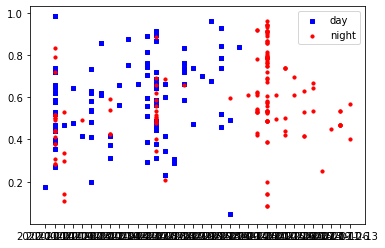

In [130]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(day, day_energy, s=10, c='b', marker="s", label='day')
ax1.scatter(night, night_energy, s=10, c='r', marker="o", label='night')
plt.legend(loc='upper right');
plt.show()

In [ ]:
# extract the number of times a track playes
# most msPlayed on a particular day
# favourite artist 